In [146]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import  matplotlib.pyplot as plt
import numpy as np

In [147]:
data = pd.read_csv('/Users/kseniagorchakova/Library/Mobile Documents/com~apple~CloudDocs/Education/!Profession_DS/Машинное обучение/Лекция_4_Оценка точности модели и тд/Материалы к ДЗ/athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [149]:
# обнуляем ячейки с отсутствием данных
data = data[pd.isnull(data['height']) == 0 ]
data = data[pd.isnull(data['weight']) == 0 ]

In [150]:
# Формируем набор признаков
selectedColumns = data [['height', 'sport', 'weight']]
x = pd.get_dummies (selectedColumns, columns = ['sport'])
x.head()

,height,weight,sport_aquatics,sport_archery,sport_athletics,sport_badminton,sport_basketball,sport_canoe,sport_cycling,sport_equestrian,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1.72,64.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.68,56.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.98,79.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.83,80.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.81,71.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
# Формируем целевую переменную
y_transform = pd.get_dummies (data['sex'], columns = ['sex'])
# Выбираем только один столбец с полом (1-мужчина, 0 - женщина)
y = y_transform['male']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: male, dtype: uint8

In [152]:
model = LogisticRegression(max_iter=10000)

In [153]:
# Разбиваем на обучающую и тестовую выборку
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [154]:
# Обучаем модель на наших данных 
model.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [155]:
# Прогнозные значения
predictions = model.predict_proba(x_test)
predictions[:2]

array([[0.06870273, 0.93129727],
       [0.67549252, 0.32450748]])

In [156]:
model.score(x_train, y_train)

0.8172368421052632

In [157]:
model.score(x_test, y_test)

0.8152240638428484

In [158]:
# Оценим качество модели и посчитаем tpr и fpr
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

for predicted_prob, actual in zip( predictions[:, 1], y_test ):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [159]:
tp, fp, fn, tn

(1454, 294, 308, 1202)

In [160]:
# Accuracy
(tp + tn) / (tp + fp + fn + tn)

0.8152240638428484

In [161]:
# Расчет True Positive Rate (TPR)
tpr = tp / (tp+fn)
tpr

0.8251986379114642

In [162]:
# Расчет False Positive Rate (FPR)
fpr = fp / (fp+tn)
fpr

0.196524064171123

In [163]:
precision = tp / (tp + fp)
precision

0.8318077803203662

In [164]:
recall = tp / (tp + fn)
recall

0.8251986379114642

### Построим график ROC AUC

In [197]:
# Построить рок кривую своими руками
tp_r = 0 # True positive
fp_r = 0 # False positive
fn_r = 0 # False negative
tn_r = 0 # True negative
thresholds = np.linspace(0,1,1500) # значения трешхолда
tpr_r = []
fpr_r = []

In [198]:
for thr in thresholds:
    tp_r = 0 # True positive
    fp_r = 0 # False positive
    fn_r = 0 # False negative
    tn_r = 0 # True negative
    for predicted_prob_1, actual_1 in zip( predictions[:, 1], y_test):
        if predicted_prob_1 >= thr: # Менять здесь значения после итерации и записывать в переменные tpr_r/fpr_r
            predicted_r = 1
        else:
            predicted_r = 0
            
        if predicted_r == 1:
            if actual_1 == 1:
                tp_r += 1
            else:
                fp_r += 1
        else:
            if actual_1 == 1:
                fn_r += 1
            else:
                tn_r += 1

        
    tpr_r.append(tp_r / (tp_r+fn_r))
    fpr_r.append(fp_r / (fp_r+tn_r))

In [199]:
for line in zip( sorted(fpr_r)[:10], sorted(tpr_r)[:10], thres[:10] ):
    print( line )

(0.0, 0.0, 0.008470548143781528)
(0.0, 0.01191827468785471, 0.008811009847205427)
(0.0006684491978609625, 0.019296254256526674, 0.009741550603802038)
(0.001336898395721925, 0.022701475595913734, 0.01016692606276403)
(0.001336898395721925, 0.026106696935300794, 0.010176189594435817)
(0.002005347593582888, 0.027809307604994324, 0.011701805314306722)
(0.002005347593582888, 0.031214528944381384, 0.01186873790282807)
(0.002005347593582888, 0.03234960272417707, 0.011873648182788517)
(0.00267379679144385, 0.034619750283768444, 0.012010408529914158)
(0.0033422459893048127, 0.03859250851305335, 0.012399546285762572)


In [200]:
print(len(thresholds))
print(len(tpr_r))
print(len(fpr_r))

1500
1500
1500


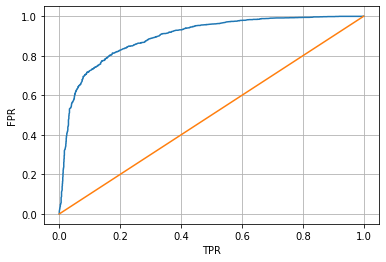

In [201]:
plt.plot(sorted(fpr_r,reverse=True), sorted(tpr_r,reverse=True))
plt.plot([0, 1], [0, 1])
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.grid()

In [169]:
# ROC кривая с помощью встроенных методов

In [170]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [171]:
fpr, tpr, thres = roc_curve(y_test, predictions[:, 1])

In [172]:
for line in zip( fpr[:10], tpr[:10], thres[:10] ):
    print( line )

(0.0, 0.0, 1.9999908980658372)
(0.0, 0.0005675368898978433, 0.9999908980658372)
(0.0, 0.01872871736662883, 0.9987557754824398)
(0.0006684491978609625, 0.01872871736662883, 0.9987452734137724)
(0.0006684491978609625, 0.02043132803632236, 0.9986286047115035)
(0.001336898395721925, 0.02043132803632236, 0.9985220166987373)
(0.001336898395721925, 0.026674233825198637, 0.9972291526654652)
(0.002005347593582888, 0.026674233825198637, 0.9969142554465875)
(0.002005347593582888, 0.03234960272417707, 0.9954917110383182)
(0.00267379679144385, 0.03234960272417707, 0.9953228021080329)


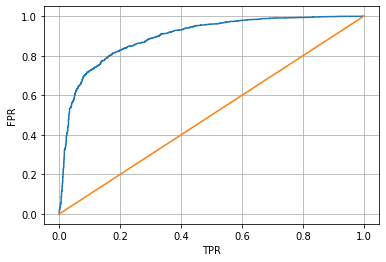

In [173]:
plt.plot(fpr, tpr )
plt.plot([0, 1], [0, 1])
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.grid()

In [174]:
# Посчитаем площадь под кривой ROC
roc_auc_score( y_test, predictions[:, 1] )

0.8958825881503153

### Построим график precision-recall

In [208]:
# Построим график precision-recall своими руками
tp_pr = 0 # True positive
fp_pr = 0 # False positive
fn_pr = 0 # False negative
tn_pr = 0 # True negative
precision = []
recall = []
eps = np.sqrt(np.finfo(float).eps)

In [209]:
for thr in thresholds:
    tp_pr = 0 # True positive
    fp_pr = 0 # False positive
    fn_pr = 0 # False negative
    tn_pr = 0 # True negative
    for predicted_prob_2, actual_2 in zip( predictions[:, 1], y_test):
        if predicted_prob_2 >= thr:
            predicted_pr = 1
        else:
            predicted_pr = 0
            
        if predicted_pr == 1:
            if actual_2 == 1:
                tp_pr += 1
            else:
                fp_pr += 1
        else:
            if actual_2 == 1:
                fn_pr += 1
            else:
                tn_pr += 1

# Добавила eps тк ломается цикл - есть деление на 0      
    precision.append(tp_pr / (tp_pr+fp_pr+eps))
    recall.append(tp_pr / (tp_pr+fn_pr+eps))

In [210]:
print(len(thresholds))
print(len(precision))
print(len(recall))

1500
1500
1500


(0.0, 1.1)

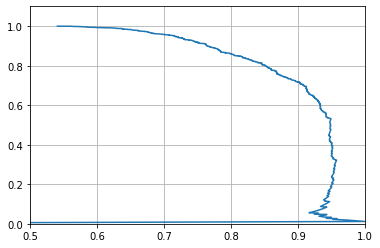

In [214]:
plt.plot(precision,recall)
plt.grid()
plt.xlim(0.5,1)
plt.ylim(0,1.1)

In [178]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [179]:
pr, re, thres = precision_recall_curve( y_test, predictions[:, 1] )

In [180]:
pr.shape, thres.shape

((2783,), (2782,))

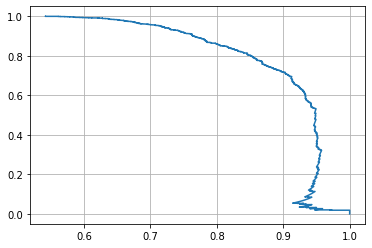

In [181]:
plt.plot(pr,re)
plt.grid()

In [182]:
# площадь под кривой
average_precision_score( y_test, predictions[:, 1] )

0.8997782550838052